In [1]:
%matplotlib inline

import matplotlib
import pandas
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist

/home/rupert/anaconda3/envs/DataScience/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00ac42d400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f00abdc8470>]], dtype=object)

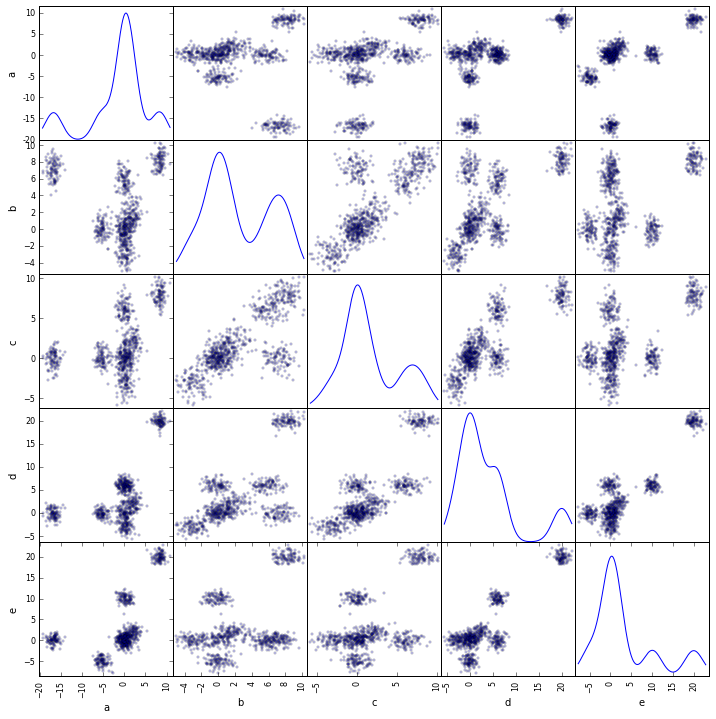

In [2]:
cluster_data = pandas.read_csv('cluster_data.csv')
sub_cluster_data = cluster_data.drop(cluster_data.columns[[0]], axis=1)
#sub_cluster_data

pandas.tools.plotting.scatter_matrix(sub_cluster_data, alpha=0.2, figsize=(12,12), diagonal='kde')

In [3]:
## K-means clustering
# Use Silhouette Scoring to identify the ideal number of clusters

from sklearn.metrics import silhouette_score

s = []
N_clusters = range(2,15)
for n_clusters in N_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(sub_cluster_data.as_matrix())

    # Calculate S. score for current number of clusters
    s.append(silhouette_score(sub_cluster_data.as_matrix(), kmeans.labels_, metric='euclidean'))

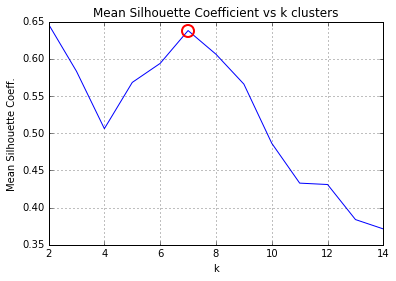

In [4]:
# Plot the results
kIdx = 5
plt.plot(N_clusters,s)
plt.plot(N_clusters[kIdx],s[kIdx], marker='o', markersize=12, 
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.ylabel("Mean Silhouette Coeff.")
plt.xlabel("k")
plt.title("Mean Silhouette Coefficient vs k clusters")
plt.grid()

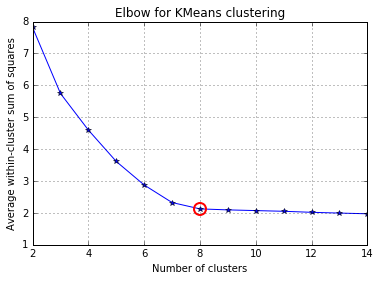

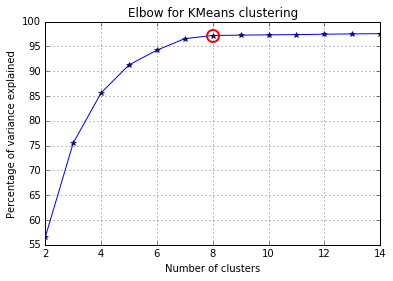

In [5]:
# Confirm the choice of number of clusters using the Elbow method
# Taken from:
## http://datascience.stackexchange.com/questions/6508/k-means-incoherent-behaviour-choosing-k-with-elbow-method-bic-variance-explain

K = range(2,15)
KM = [KMeans(n_clusters=k).fit(sub_cluster_data.as_matrix()) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(sub_cluster_data, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/sub_cluster_data.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(sub_cluster_data)**2)/sub_cluster_data.shape[0]
bss = tss-wcss

kIdx = 6

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
ax.plot(K[kIdx], bss[kIdx]/tss*100, marker='o', markersize=12, 
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')

In [6]:
# Re-do K-means clustering using optimum values
np.random.seed(5)
optimum_k = 8
kmeans = KMeans(n_clusters=optimum_k)
kmeans.fit(sub_cluster_data.as_matrix())

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [7]:
# Use PCA to identify the key dimensionality in the data 
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(sub_cluster_data)
pca.explained_variance_ratio_

array([ 0.72143776,  0.18607417,  0.07468176,  0.0114741 ,  0.00633222])

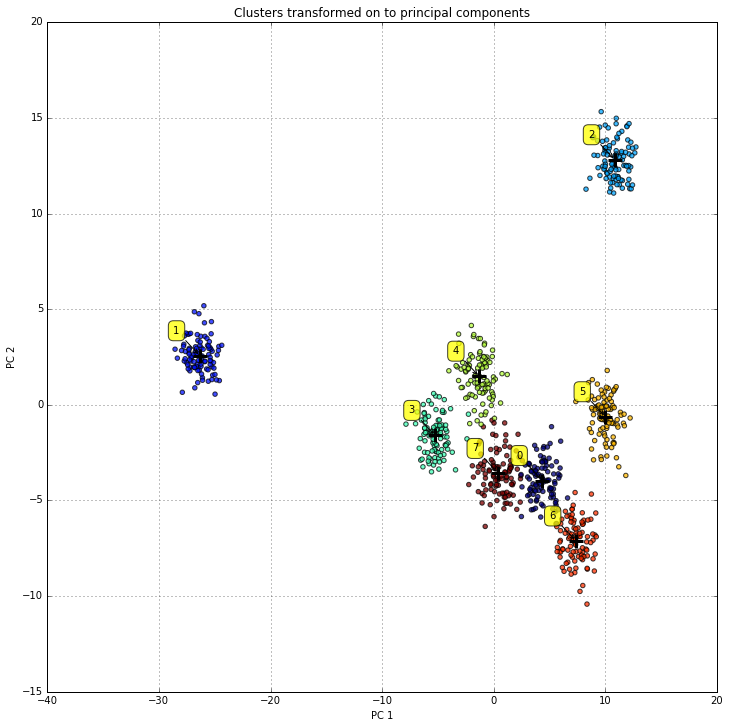

In [8]:
# The first two principal components explain ~91% of the variation, so could simplify to 2-d 

# Transform the raw data and the identified centroids on to a 2-d plane
np.random.seed(5)
pca = PCA(n_components=2)
pca.fit(sub_cluster_data)
points_pc = pca.transform(sub_cluster_data)
centroids_pc = pca.transform(centroids)

# Plot
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.scatter(points_pc[:,0],points_pc[:,1], c=labels, alpha=0.75)
ax.scatter(centroids_pc[:,0],centroids_pc[:,1],marker="+",s=200,linewidths=3,c="k")
for label, x, y in zip(range(optimum_k), centroids_pc[:,0],centroids_pc[:,1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.75),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.grid(True)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clusters transformed on to principal components')

plt.show()


In [9]:
np.set_printoptions(precision=3)
print(centroids)

[[ -1.839e-02   1.136e-01   1.067e-01   7.011e-02   7.158e-02]
 [  8.302e+00   8.161e+00   7.895e+00   1.991e+01   2.001e+01]
 [ -1.680e+01   7.113e+00  -5.263e-02  -1.577e-01   1.053e-01]
 [  2.299e-01  -1.893e-01  -2.029e-02   5.974e+00   1.001e+01]
 [  8.073e-03   5.797e+00   6.155e+00   6.009e+00  -1.311e-01]
 [ -5.256e+00   1.876e-02   4.612e-02  -1.526e-01  -5.028e+00]
 [  2.335e-01  -2.993e+00  -3.075e+00  -3.024e+00  -3.750e-02]
 [  1.990e+00   1.798e+00   2.031e+00   2.003e+00   2.011e+00]]


In [10]:
grouped = sub_cluster_data.groupby(labels)
grouped.size()

0     98
1    100
2    100
3    100
4    100
5    100
6    100
7    102
dtype: int64

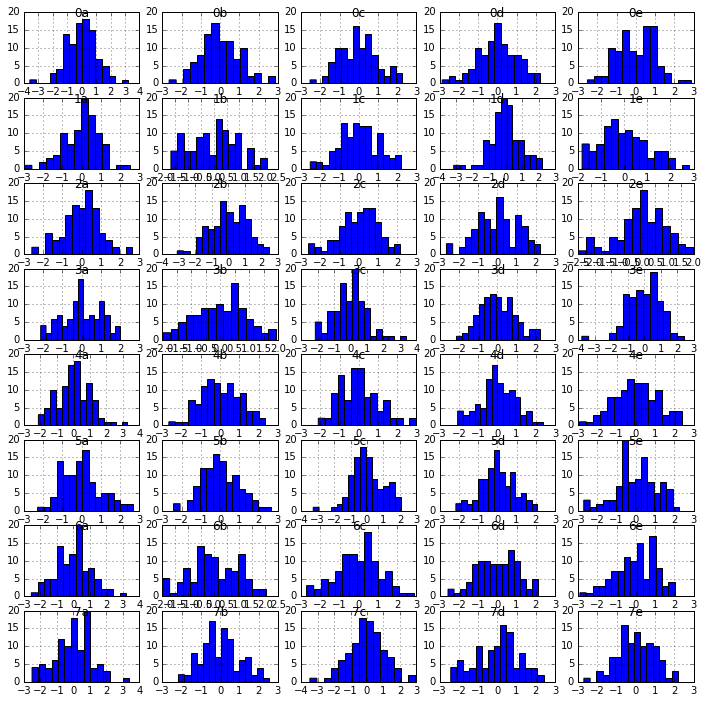

In [11]:
# Plot
i=0
fig = plt.figure(figsize=(12,12))
for group in range(optimum_k):
    for dim in list(sub_cluster_data.columns.values):
        i+=1
        ax = fig.add_subplot(optimum_k,5,i)
        ax.hist(grouped.get_group(group)[dim].values - grouped.get_group(group)[dim].mean(), 15)
        ax.set_ylim([0,20])
        plt.grid(True)
        plt.title(str(group) + dim, {'verticalalignment':'top'})
        
plt.show()

In [12]:
grouped.std()

,a,b,c,d,e
0,1.040547,0.977946,0.967346,1.025609,0.987438
1,0.877831,0.920956,1.022206,0.913442,1.015096
2,0.952203,1.099176,1.003628,1.074818,0.934234
3,1.004971,0.878270,0.959916,0.922856,0.978488
4,0.987209,1.032310,1.017857,0.925719,1.127199
5,1.005256,0.972071,0.952645,0.896333,1.038651
6,1.033670,0.927266,1.115541,1.036140,1.048893
7,1.102235,0.992953,1.107663,1.132962,0.945299


In [13]:
new_points = list()
labels2 = list()
for group in range(optimum_k):
    new_points.append(np.random.multivariate_normal(centroids[group,:], 
                                    grouped.std().values[group,:] * np.eye(5), 
                                    100))
    labels2.append(group * np.ones(100))

new_points = pandas.DataFrame(np.vstack(new_points), columns=['a','b','c','d','e'])
labels2 = np.vstack(labels2)

In [14]:
group=1
centroids[group,:]
grouped.std().values[group,:] * np.eye(5)
np.random.multivariate_normal(centroids[group,:], 
                                    grouped.std().values[group,:] * np.eye(5), 
                                    100)

array([[  8.874,   7.723,   6.33 ,  19.641,  20.239],
       [  9.825,   9.375,   8.828,  20.368,  20.123],
       [  8.075,   7.07 ,   8.038,  20.661,  21.475],
       [  7.638,   6.156,   7.224,  20.989,  16.732],
       [  8.083,   7.845,   8.867,  19.51 ,  21.215],
       [ 10.405,   8.588,   8.377,  18.968,  19.539],
       [  8.541,   8.509,   8.503,  20.513,  18.739],
       [  8.953,   8.846,   6.32 ,  21.495,  19.807],
       [ 10.305,   8.402,   9.829,  20.562,  19.21 ],
       [  7.933,   8.396,   7.17 ,  20.218,  19.224],
       [  7.661,   8.351,   7.093,  17.933,  19.81 ],
       [  6.814,   7.302,   9.897,  20.95 ,  20.819],
       [  7.837,   7.147,   7.293,  20.412,  19.978],
       [  7.339,   7.537,   8.371,  21.867,  18.881],
       [  8.851,   7.533,   6.425,  20.567,  20.212],
       [  8.436,   8.387,   8.108,  18.788,  19.976],
       [  6.967,   8.636,   9.095,  20.878,  20.173],
       [  8.366,   8.472,   8.13 ,  18.979,  18.768],
       [  8.808,   9.333,   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00a7f879e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f00a4dff828>]], dtype=object)

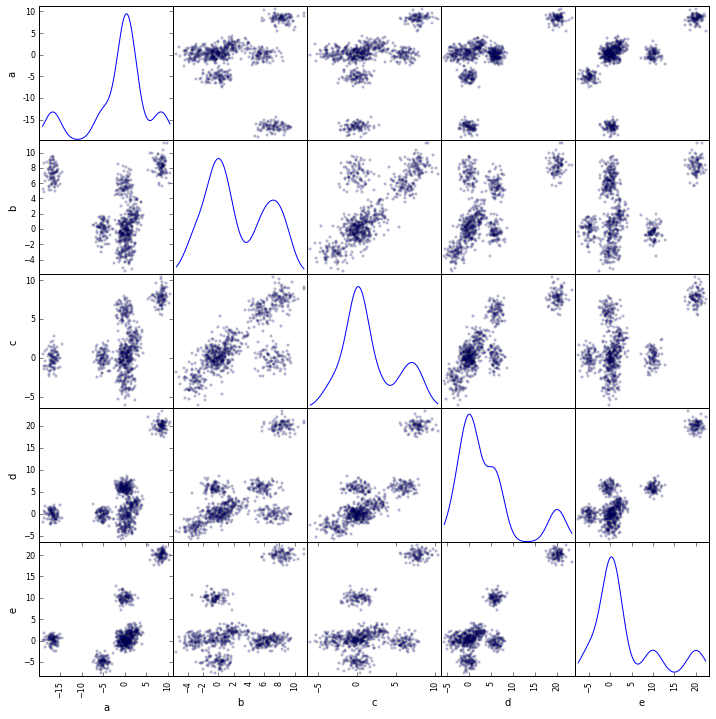

In [15]:
pandas.tools.plotting.scatter_matrix(new_points, alpha=0.2, figsize=(12,12), diagonal='kde')

In [16]:
# Re-do K-means clustering using optimum values
np.random.seed(5)
optimum_k = 8
kmeans2 = KMeans(n_clusters=optimum_k)
kmeans2.fit(new_points)

labels2 = kmeans2.labels_
centroids2 = kmeans2.cluster_centers_

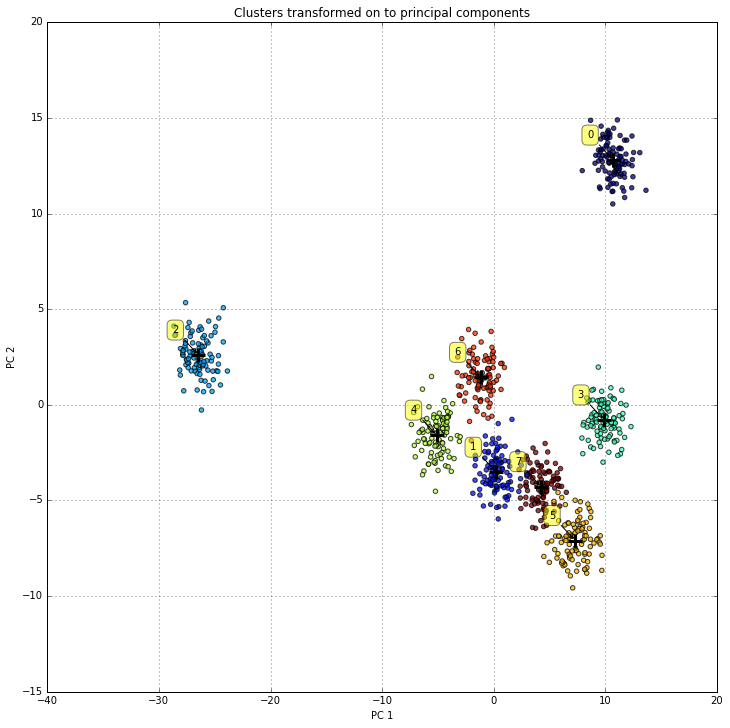

In [17]:
# Transform the raw data and the identified centroids on to a 2-d plane
np.random.seed(5)
pca2 = PCA(n_components=2)
pca2.fit(new_points)
points_pc2 = pca.transform(new_points)
centroids_pc2 = pca.transform(centroids2)

# Plot
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.scatter(points_pc2[:,0],points_pc2[:,1], c=labels2, alpha=0.75)
ax.scatter(centroids_pc2[:,0],centroids_pc2[:,1],marker="+",s=200,linewidths=3,c="k")
for label, x, y in zip(range(optimum_k), centroids_pc2[:,0],centroids_pc2[:,1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.grid(True)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clusters transformed on to principal components')

plt.show()